In [1]:
# This overplots X Ari spectra, to see line filling

# Created 2022 Aug 25 by E.S.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import numpy as np
import os

In [2]:
stem = "/Users/bandari/Documents/git.repos/rrlfe/rrlfe_io_20220803_01_mcd/realizations_output/norm/final/"

In [3]:
# read in phases

df_phases = pd.read_csv("./data/phases_all_master_no_repeat_fits.csv")

In [4]:
df_phases["row_match"] = df_phases["spec_file"].str.split(".fits", expand=True)[0]

In [5]:
df_file_list = pd.DataFrame(glob.glob(stem + "X_Ari*"), columns=["file_names_full2"])

In [44]:
df_file_list.loc[0].values[0]

'/Users/bandari/Documents/git.repos/rrlfe/rrlfe_io_20220803_01_mcd/realizations_output/norm/final/X_Ari__05_noise_ver_000.dat'

In [6]:
df_phases_sorted = df_phases.sort_values(by="my_phase")

In [7]:
df_phases_sorted["row_match"]

77     SV_Eri_02
87     TT_Lyn_06
130    VX_Her_04
106    TV_Lyn_08
98     TU_UMa_07
51     RU_Psc_03
18     AV_Peg_03
5      AR_Per_06
158    V_535__06
131    VX_Her_05
36     RR_Cet_09
28     RR_Cet_01
44     RR_Leo_08
166    X_Ari__08
7      AR_Per_08
6      AR_Per_07
50     RU_Psc_02
132    VX_Her_06
29     RR_Cet_02
14     AR_Per_15
88     TT_Lyn_07
61     RU_Psc_13
93     TU_UMa_02
30     RR_Cet_03
133    VX_Her_07
94     TU_UMa_03
31     RR_Cet_04
107    TV_Lyn_09
62     RU_Psc_14
95     TU_UMa_04
         ...    
117    T_Sex__02
42     RR_Leo_06
23     AV_Peg_08
112    TW_Lyn_04
2      AR_Per_03
35     RR_Cet_08
55     RU_Psc_07
96     TU_UMa_05
43     RR_Leo_07
79     SV_Eri_04
56     RU_Psc_08
11     AR_Per_12
113    TW_Lyn_05
24     AV_Peg_09
58     RU_Psc_10
57     RU_Psc_09
12     AR_Per_13
90     TT_Lyn_09
17     AV_Peg_02
128    VX_Her_02
3      AR_Per_04
97     TU_UMa_06
59     RU_Psc_11
13     AR_Per_14
118    T_Sex__03
165    X_Ari__07
129    VX_Her_03
114    TW_Lyn_

In [8]:
df_phases_sorted["file"]

77     SV_Eri_02.fits
87     TT_Lyn_06.fits
130    VX_Her_04.fits
106    TV_Lyn_08.fits
98     TU_UMa_07.fits
51     RU_Psc_03.fits
18     AV_Peg_03.fits
5      AR_Per_06.fits
158    V_535__06.fits
131    VX_Her_05.fits
36     RR_Cet_09.fits
28     RR_Cet_01.fits
44     RR_Leo_08.fits
166    X_Ari__08.fits
7      AR_Per_08.fits
6      AR_Per_07.fits
50     RU_Psc_02.fits
132    VX_Her_06.fits
29     RR_Cet_02.fits
14     AR_Per_15.fits
88     TT_Lyn_07.fits
61     RU_Psc_13.fits
93     TU_UMa_02.fits
30     RR_Cet_03.fits
133    VX_Her_07.fits
94     TU_UMa_03.fits
31     RR_Cet_04.fits
107    TV_Lyn_09.fits
62     RU_Psc_14.fits
95     TU_UMa_04.fits
            ...      
117    T_Sex__02.fits
42     RR_Leo_06.fits
23     AV_Peg_08.fits
112    TW_Lyn_04.fits
2      AR_Per_03.fits
35     RR_Cet_08.fits
55     RU_Psc_07.fits
96     TU_UMa_05.fits
43     RR_Leo_07.fits
79     SV_Eri_04.fits
56     RU_Psc_08.fits
11     AR_Per_12.fits
113    TW_Lyn_05.fits
24     AV_Peg_09.fits
58     RU_

163    0.502864
Name: my_phase, dtype: float64
163    X_Ari__05.fits
Name: file, dtype: object
162    0.484703
Name: my_phase, dtype: float64
162    X_Ari__04.fits
Name: file, dtype: object
159    0.296148
Name: my_phase, dtype: float64
159    X_Ari__01.fits
Name: file, dtype: object
165    0.983349
Name: my_phase, dtype: float64
165    X_Ari__07.fits
Name: file, dtype: object
160    0.308325
Name: my_phase, dtype: float64
160    X_Ari__02.fits
Name: file, dtype: object
164    0.479424
Name: my_phase, dtype: float64
164    X_Ari__06.fits
Name: file, dtype: object
161    0.400787
Name: my_phase, dtype: float64
161    X_Ari__03.fits
Name: file, dtype: object
166    0.053851
Name: my_phase, dtype: float64
166    X_Ari__08.fits
Name: file, dtype: object
167    0.557701
Name: my_phase, dtype: float64
167    X_Ari__09.fits
Name: file, dtype: object
168    0.642069
Name: my_phase, dtype: float64
168    X_Ari__10.fits
Name: file, dtype: object


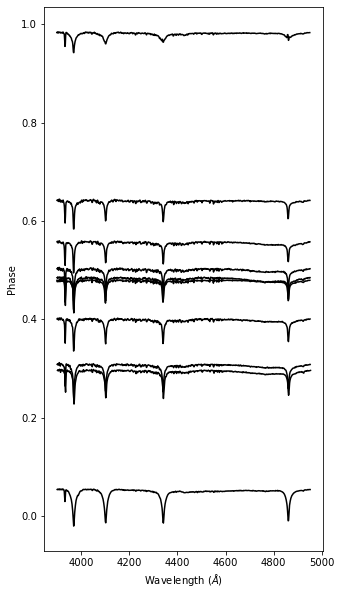

In [39]:
#fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)
plt.figure(figsize=(5,10))

for file_num in range(0,len(df_file_list)):
    
    file_name_abs = df_file_list["file_names_full2"].loc[file_num]
    
    test = pd.read_csv(file_name_abs, names=["wavel","flux"], delim_whitespace=True)
    
    # find the phase
    idx = df_phases_sorted["row_match"] == os.path.basename(file_name_abs).split("_noise_ver")[0]
    phase_val = df_phases_sorted["my_phase"].loc[idx]
    fyi_file_val = df_phases_sorted["file"].loc[idx]
    
    # y-offset for plotting
    offset_y = phase_val.values[0]
    
    #print(file_num)
    print(phase_val)
    print(fyi_file_val)
    
    plt.plot(test["wavel"],offset_y+0.1*(test["flux"]-1.),color="k") # subtract 1 to keep text lined up with continuum
    #ax1.annotate(str(phase_val.values[0]), xy=(5000,offset_y), xytext=(5000,offset_y))

#plt.ylim([0.7,3.3])
plt.xlabel("Wavelength ($\AA$)")
plt.ylabel("Phase")
plt.show()

In [59]:
df_spec_0 = pd.read_csv(stem + "/X_Ari__03_noise_ver_000.dat", names=["wavel","flux"], delim_whitespace=True)
df_spec_1 = pd.read_csv(stem + "/X_Ari__10_noise_ver_000.dat", names=["wavel","flux"], delim_whitespace=True)
df_spec_2 = pd.read_csv(stem + "/X_Ari__07_noise_ver_000.dat", names=["wavel","flux"], delim_whitespace=True)

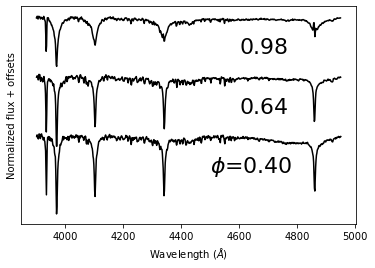

In [73]:
plt.clf()
plt.plot(df_spec_0["wavel"], df_spec_0["flux"], color="k")
plt.annotate("$\phi$=0.40", xy=(4600,0.6+0.0), xytext=(4500,0.7+0.0), fontsize=22)

plt.plot(df_spec_1["wavel"], df_spec_1["flux"]+0.5, color="k")
plt.annotate(str(0.64), xy=(4600,0.6+0.5), xytext=(4600,0.7+0.5), fontsize=22)

plt.plot(df_spec_2["wavel"], df_spec_2["flux"]+1., color="k")
plt.annotate(str(0.98), xy=(4600,0.6+1.0), xytext=(4600,0.7+1.0), fontsize=22)

plt.xlabel("Wavelength ($\AA$)")
plt.ylabel("Normalized flux + offsets")
plt.yticks([]) 
plt.show()

In [61]:
df_phases

df_phases

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,file,ut_epoch,ra,dec,jd,bjd_x,star_match,...,Npts,Sigmaclip,Dates,Phases,ndl_phase,ndl_time_baselines,ndl_baseline_div_period,error_ndl_phase,error_my_phase,row_match
0,0,0,37,AR_Per_01.fits,2012-12-21 04:14:22.28,04:18:10.10,+47:20:05.40,2.456283e+06,2.456283e+06,AR Per,...,100.0,None,2.456283e+06,0.666955,0.666955,255.472138,600.333044,0.005804,0.006636,AR_Per_01
1,1,1,136,AR_Per_02.fits,2012-12-21 04:27:07.07,04:18:10.40,+47:20:05.0,2.456283e+06,2.456283e+06,AR Per,...,100.0,None,2.456283e+06,0.687755,0.687755,255.463286,600.312244,0.005804,0.006636,AR_Per_02
2,2,2,164,AR_Per_03.fits,2012-12-21 06:08:14.21,04:18:12.40,+47:19:58.80,2.456283e+06,2.456283e+06,AR Per,...,100.0,None,2.456283e+06,0.852764,0.852764,255.393067,600.147235,0.005803,0.006634,AR_Per_03
3,3,3,105,AR_Per_04.fits,2012-12-21 07:08:50.50,04:18:14.90,+47:19:59.30,2.456283e+06,2.456283e+06,AR Per,...,100.0,None,2.456283e+06,0.951660,0.951660,255.350981,600.048339,0.005802,0.006633,AR_Per_04
4,4,4,112,AR_Per_05.fits,2012-12-21 07:32:16.76,04:18:17.00,+47:20:00.60,2.456283e+06,2.456283e+06,AR Per,...,100.0,None,2.456283e+06,0.989906,0.989906,255.334706,600.010093,0.005801,0.006633,AR_Per_05
5,5,5,65,AR_Per_06.fits,2012-12-21 07:51:03.83,04:18:18.00,+47:20:01.90,2.456283e+06,2.456283e+06,AR Per,...,100.0,None,2.456283e+06,0.020559,0.020559,255.321661,599.979440,0.005801,0.006632,AR_Per_06
6,6,6,76,AR_Per_07.fits,2012-12-21 08:14:07.25,04:18:19.50,+47:20:04.50,2.456283e+06,2.456283e+06,AR Per,...,100.0,None,2.456283e+06,0.058184,0.058184,255.305650,599.941815,0.005801,0.006632,AR_Per_07
7,7,7,95,AR_Per_08.fits,2012-12-22 04:36:40.09,04:18:10.10,+47:20:00.10,2.456284e+06,2.456284e+06,AR Per,...,100.0,None,2.456284e+06,0.053165,0.053165,254.456684,597.946834,0.005781,0.006613,AR_Per_08
8,8,8,126,AR_Per_09.fits,2012-12-22 05:57:06.72,04:18:12.20,+47:20:01.0,2.456284e+06,2.456284e+06,AR Per,...,100.0,None,2.456284e+06,0.184435,0.184435,254.400822,597.815564,0.005780,0.006612,AR_Per_09
9,9,9,60,AR_Per_10.fits,2012-12-22 07:39:54.86,04:18:17.40,+47:20:11.10,2.456284e+06,2.456284e+06,AR Per,...,100.0,None,2.456284e+06,0.352190,0.352190,254.329434,597.647809,0.005778,0.006610,AR_Per_10


In [46]:
file_list["file_names_basename2"] = os.path.basename(df_file_list["file_names_full2"].str())

TypeError: 'StringMethods' object is not callable

In [44]:
list(map(os.path.basename, glob.glob(stem + "X_Ari*")))

['X_Ari__05_noise_ver_000.dat',
 'X_Ari__04_noise_ver_000.dat',
 'X_Ari__01_noise_ver_000.dat',
 'X_Ari__07_noise_ver_000.dat',
 'X_Ari__02_noise_ver_000.dat',
 'X_Ari__06_noise_ver_000.dat',
 'X_Ari__03_noise_ver_000.dat',
 'X_Ari__08_noise_ver_000.dat',
 'X_Ari__09_noise_ver_000.dat',
 'X_Ari__10_noise_ver_000.dat']